Import Necessary Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

Configuration and Directory Setup

In [9]:
models = ["GPT-4", "PaLM 2", "LLaMA 2", "BLOOMZ", "OPT-66B", "T5-XXL"]
criteria = {
    'Perplexity': {'direction': 'min', 'weight': 0.25},
    'BLEU': {'direction': 'max', 'weight': 0.25},
    'Size (B)': {'direction': 'min', 'weight': 0.20},
    'Speed (tokens/sec)': {'direction': 'max', 'weight': 0.15},
    'Diversity': {'direction': 'max', 'weight': 0.15}
}

Sample Data

In [10]:
data = {
    'Model': models,
    'Perplexity': [15.2, 18.7, 22.1, 24.5, 26.8, 28.3],
    'BLEU': [0.92, 0.88, 0.85, 0.82, 0.79, 0.75],
    'Size (B)': [220, 340, 70, 175, 66, 13],
    'Speed (tokens/sec)': [85, 62, 110, 95, 120, 150],
    'Diversity': [0.88, 0.85, 0.82, 0.79, 0.76, 0.72]
}

df = pd.DataFrame(data).set_index('Model')

TOPSIS Implementation

In [11]:
def topsis(df, criteria):
    # Normalization
    normalized = df.apply(lambda x: x/np.sqrt(sum(x**2)), axis=0)

    # Weighting
    weights = [criteria[col]['weight'] for col in df.columns]
    weighted = normalized * weights

    # Ideal solutions
    ideal_best = [
        weighted[col].min() if cfg['direction'] == 'min' else weighted[col].max()
        for col, cfg in criteria.items()
    ]
    ideal_worst = [
        weighted[col].max() if cfg['direction'] == 'min' else weighted[col].min()
        for col, cfg in criteria.items()
    ]

    # Distances calculation
    S_plus = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
    S_minus = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

    # Closeness coefficient
    return S_minus / (S_plus + S_minus)

closeness = topsis(df, criteria).sort_values(ascending=False)

Enhanced Visualizations

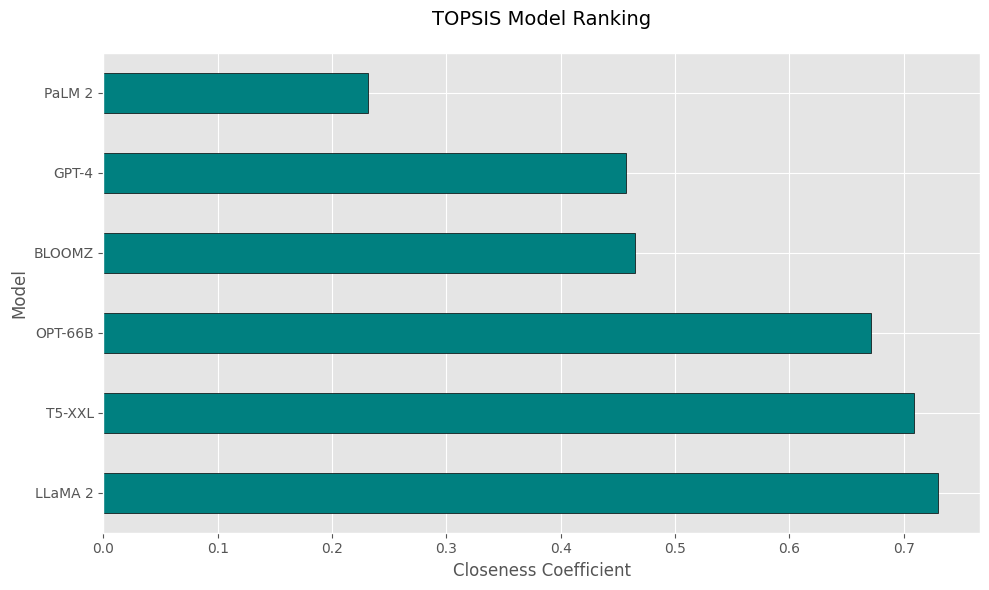

In [12]:
plt.style.use('ggplot')

# 1. Closeness Coefficient Horizontal Bar Chart
plt.figure(figsize=(10, 6))
closeness.plot(kind='barh', color='teal', edgecolor='black')
plt.title('TOPSIS Model Ranking', fontsize=14, pad=20)
plt.xlabel('Closeness Coefficient', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()


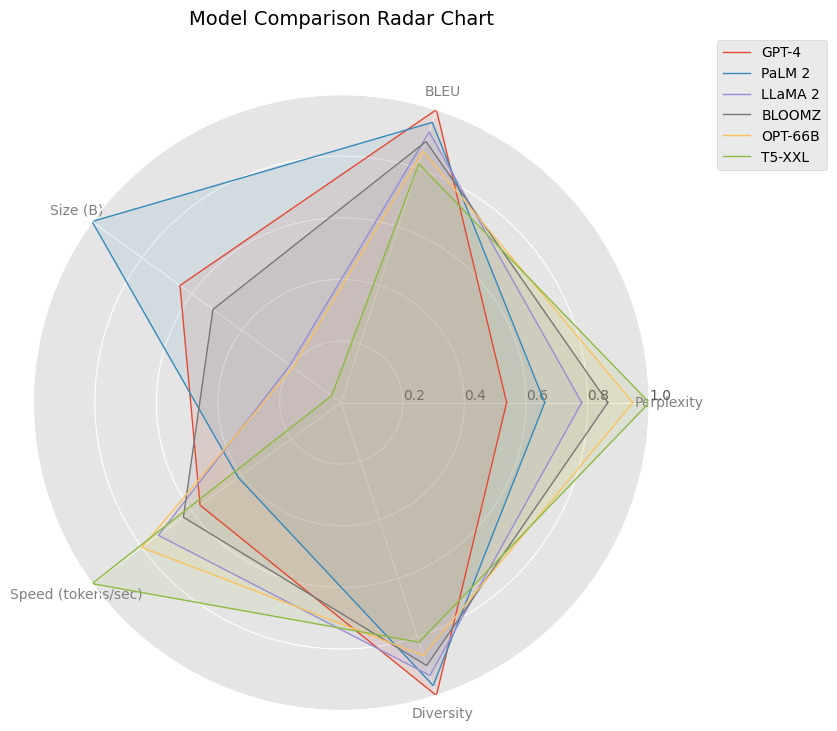

In [15]:
# 2. Radar Chart
def create_radar_chart(df, title):
    categories = list(df.columns)
    N = len(categories)

    angles = [n / N * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=10)
    ax.set_rlabel_position(0)
    plt.ylim(0, 1)
    for model in df.index:
        values = df.loc[model].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, label=model)
        ax.fill(angles, values, alpha=0.1)

    plt.title(title, size=14, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()
radar_df = df.apply(lambda x: x/x.max(), axis=0)
create_radar_chart(radar_df, "Model Comparison Radar Chart")


Results Export

In [18]:
# 3. Results Table
print("\nFinal Rankings:")
print(closeness.to_markdown())


Final Rankings:
| Model   |        0 |
|:--------|---------:|
| LLaMA 2 | 0.730182 |
| T5-XXL  | 0.709371 |
| OPT-66B | 0.671117 |
| BLOOMZ  | 0.465343 |
| GPT-4   | 0.457225 |
| PaLM 2  | 0.23151  |
